In [125]:
import pandas as pd
import csv
import os

import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

In [126]:
base_folder = "csv/"
file_name = 'all_60s_1s_32.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'] + scalogram, inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90', 'up_bytes_silences',
       'up_bytes_silence_mean', 'up_bytes_longest_silence',
       'up_bytes_shortest_silence', 'up_packet_mean', 'up_packet_median',
       'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
       'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75',
       'up_packet_perc90', 'up_packet_silences', 'up_packet_longest_silence',
       'up_packet_shortest_silence', 'down_bytes_mean', 'down_bytes_median',
       'down_bytes_std', 'down_bytes_var', 'down_bytes_skew',
       'down_bytes_kurt', 'down_bytes_perc25', 'down_bytes_perc50',
       'down_bytes_perc75', 'down_bytes_perc90', 'down_bytes_silences',
       'down_bytes_silence_mean', 'down_bytes_longest_silence',
       'down_bytes_shortest_silence', 'down_packet_mean', 'down_packet_median',
 

In [127]:
'''
# Join applications from different capture settings
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'

# Video vs. Rest
dataset.loc[dataset['label'] == 'netflix', 'label'] = 'video'
dataset.loc[dataset['label'] == 'youtube', 'label'] = 'video'
dataset.loc[dataset['label'] == 'twitch', 'label'] = 'video'
dataset.loc[dataset['label'] == 'acestream', 'label'] = 'video'

dataset['label'].value_counts()

'''
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset.loc[dataset['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset.loc[dataset['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'

dataset = dataset[dataset['label'] != 'browsing']
#dataset = dataset[dataset['label'] != 'netflix']

dataset['label'].value_counts()


netflix      291
youtube      255
acestream    126
twitch       100
Name: label, dtype: int64

In [128]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()
dataset.corr()['label'].sort_values(ascending=False)


label                          1.000000
down_packet_perc50             0.428665
down_packet_median             0.428665
down_packet_perc25             0.426344
down_bytes_perc25              0.401102
down_packet_mean               0.398809
down_packet_perc75             0.385225
down_bytes_perc50              0.365298
down_bytes_median              0.365298
up_packet_perc25               0.357536
up_packet_median               0.327774
up_packet_perc50               0.327774
up_packet_mean                 0.322840
up_packet_perc75               0.305923
down_packet_perc90             0.301559
down_bytes_mean                0.297284
up_packet_perc90               0.286771
up_bytes_perc25                0.272751
up_bytes_mean                  0.270943
up_bytes_std                   0.269886
down_bytes_perc75              0.267403
up_bytes_perc90                0.262358
up_packet_std                  0.256686
up_bytes_perc75                0.250851
up_bytes_median                0.234948


In [87]:
def save_fig(fig_id, tight_layout=True, fig_extension="pdf", resolution=300):
    path = os.path.join(os.getcwd(), fig_id + "." + fig_extension)
    print(f"Saving figure {fig_id} to {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [88]:
dataset.describe()

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_std,down_packet_var,down_packet_skew,down_packet_kurt,down_packet_perc25,down_packet_perc50,down_packet_perc75,down_packet_perc90,down_packet_silences,label
count,1068.000000,1068.000000,1068.000000,1.068000e+03,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,...,1068.000000,1.068000e+03,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,0.000084,-0.061245,0.182055,5.190624e-01,2.734573,10.659481,-0.126562,-0.061245,0.062808,0.240460,...,0.335207,3.594244e-01,2.331217,8.216832,-0.197893,-0.102376,0.089147,0.378584,21.667603,0.277154
std,0.694171,0.533759,0.697405,3.030244e+00,1.657582,11.701820,0.202791,0.533759,1.015808,1.674444,...,0.497285,1.182122e+00,1.752431,11.901069,0.573362,0.762294,1.014133,1.405410,17.133004,0.447803
min,-0.176922,-0.176933,0.000040,1.624221e-09,-0.188956,-1.701206,-0.176933,-0.176933,-0.176933,-0.176933,...,0.000755,5.705948e-07,-1.301624,-1.972720,-0.406009,-0.406009,-0.406009,-0.406009,0.000000,0.000000
25%,-0.175395,-0.176933,0.003218,1.035757e-05,1.423934,1.414046,-0.176933,-0.176933,-0.176098,-0.173261,...,0.043086,1.856412e-03,0.926456,0.198984,-0.406009,-0.406009,-0.395889,-0.346319,3.000000,0.000000
50%,-0.172161,-0.176527,0.006789,4.608820e-05,2.634859,7.187752,-0.176933,-0.176527,-0.172802,-0.165749,...,0.124335,1.545941e-02,2.006883,3.328640,-0.406009,-0.400878,-0.355269,-0.210462,22.000000,0.000000
75%,-0.163314,-0.170287,0.019758,3.903903e-04,3.840061,16.343731,-0.174863,-0.170287,-0.158034,-0.139356,...,0.389765,1.519168e-01,3.351057,11.512290,-0.389903,-0.317072,0.026418,0.441456,38.000000,1.000000
max,9.402823,11.095846,7.102457,5.044490e+01,7.549466,55.002140,1.902611,11.095846,16.205525,17.919862,...,3.923907,1.539704e+01,7.501707,54.523818,4.947869,6.250564,8.068066,11.779693,58.000000,1.000000


<Figure size 432x288 with 0 Axes>

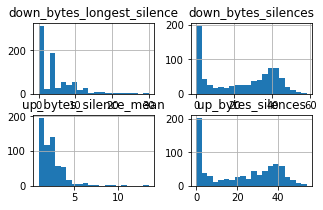

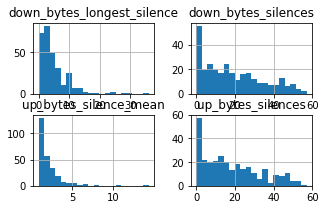

In [92]:
# browsing vs video silences hists
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

fig = plt.figure(0)
vid = dataset.loc[dataset['label'] == 0]
other= dataset.loc[dataset['label'] == 1]
h1 = vid[['down_bytes_silences', 'up_bytes_silences', 
         'up_bytes_silence_mean', 'down_bytes_longest_silence']].hist(bins=20, figsize=(5, 3))
h2 = other[['down_bytes_silences', 'up_bytes_silences', 
         'up_bytes_silence_mean', 'down_bytes_longest_silence']].hist(bins=20, figsize=(5, 3))

#save_fig('basic_stats')

Saving figure silence_cumsum to /home/agro/work/thesis/env/thesis/analysis/silence_cumsum.pdf


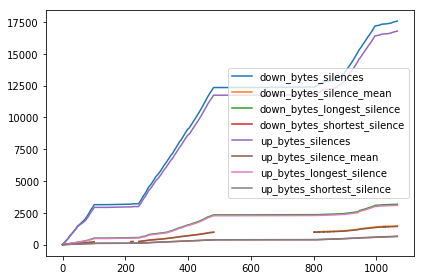

In [8]:
cs = dataset[silences].cumsum()
cs.plot().legend(loc='best')
save_fig('silence_cumsum')

/home/agro/work/thesis/env/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Saving figure bytes_skewness to /home/agro/work/thesis/env/thesis/analysis/bytes_skewness.pdf


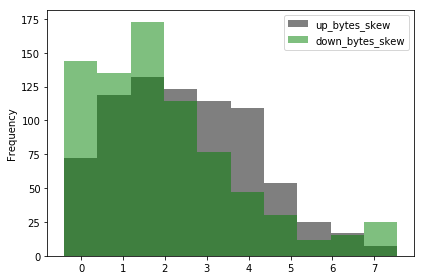

In [9]:
dataset[['up_bytes_skew', 'down_bytes_skew']].plot.hist(alpha=0.5, colors=['black', 'green'])
save_fig('bytes_skewness')

Saving figure silences_scatter to /home/agro/work/thesis/env/thesis/analysis/silences_scatter.pdf


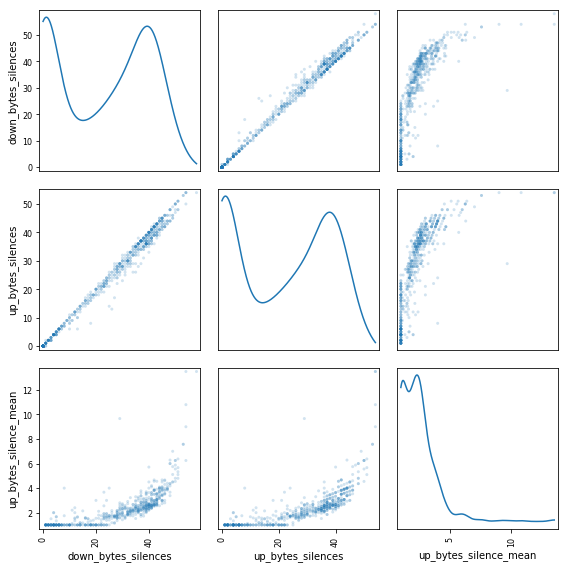

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset[['down_bytes_silences', 'up_bytes_silences', 
         'up_bytes_silence_mean']], alpha=0.2, figsize=(8,8), diagonal='kde')
save_fig('silences_scatter')

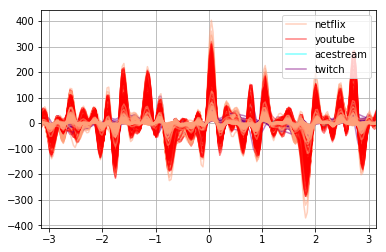

In [43]:
from pandas.plotting import andrews_curves

andrews_curves(dataset, 'label', color=['lightsalmon', 'red', 'cyan', 'purple'],alpha=0.5)

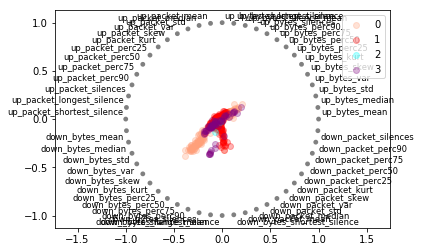

In [130]:
# usar esta para o dataset inteiro
from pandas.plotting import radviz

radviz(dataset, 'label', color=['lightsalmon', 'red', 'cyan', 'purple'], alpha=0.3)

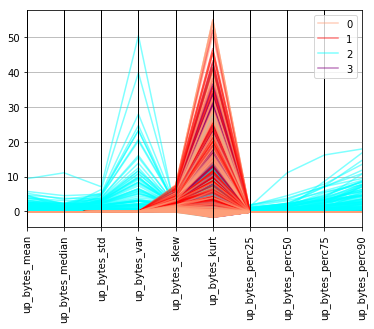

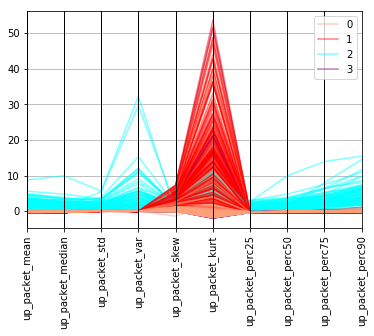

In [129]:

from pandas.plotting import parallel_coordinates

parallel_coordinates(dataset[['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90'] + ['label']], 'label', color=['lightsalmon', 'red', 'cyan', 'purple'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()



parallel_coordinates(dataset[['up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90'] + ['label']], 'label', color=['lightsalmon', 'red', 'cyan', 'purple'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()

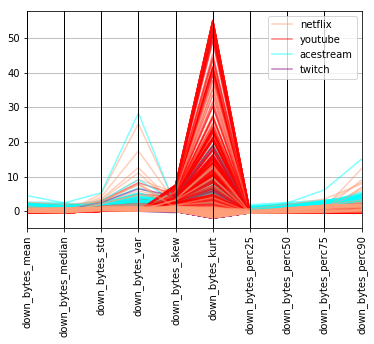

In [65]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(dataset[['down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90'] + ['label']], 'label', color=['lightsalmon', 'red', 'cyan', 'purple'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()


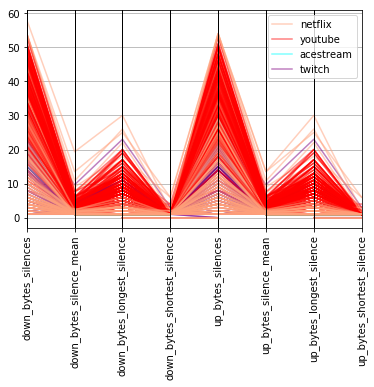

In [67]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(dataset[silences + ['label']], 'label', color=['lightsalmon', 'red', 'cyan', 'purple'], alpha=0.5)
plt.xticks(rotation=90)
plt.show()

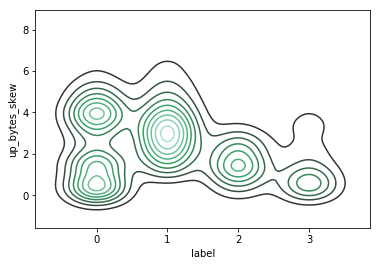

In [131]:
#this one is not bad for video vs browsing but maybe not
import seaborn as sns
sns.kdeplot(dataset.label, dataset.up_bytes_skew)

/home/agro/work/thesis/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


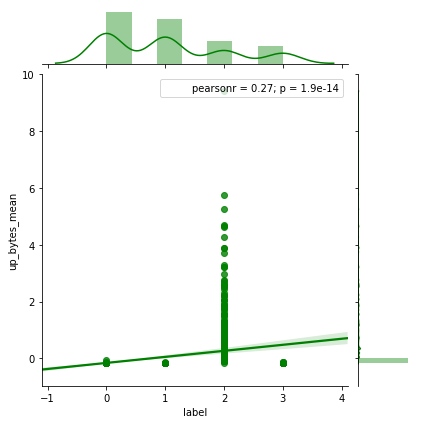

In [132]:
# Nice para video vs browsing
sns.jointplot(data=dataset, x='label', y='up_bytes_mean', kind='reg', color='g')